<a href="https://colab.research.google.com/github/wsilveira-splunk/channel_capacity/blob/master/channel_capacity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from scipy.integrate import quad

In [2]:
snr_db = list(range(-8, 31, 1))
snr = list(map(lambda x: pow(10, (x/10)), snr_db))
C_gaussian_ch = list(map(lambda x: 0.5*math.log2(1+x), snr))

p = list(map(lambda x: 0.5*math.erfc(math.sqrt(x/2)), snr))
C_bsc = list(map(lambda x: 1 - (x*math.log2(1/x)+(1-x)*math.log2(1/(1-x))), p))
C_2pam = list(map(lambda x: (2*x+math.log2(16*math.pi/x)-0.5*math.log2(2*math.pi*math.e/x)), snr))

In [34]:
def normal_distribution_function(x_int, Pn):
    h_y_not_intd = []
    y_minus_1 = scipy.stats.norm.pdf(x_int,-1,Pn)
    y_plus_1 = scipy.stats.norm.pdf(x_int,1,Pn)
    for _y_minus_1, _y_plus_1 in zip(y_minus_1, y_plus_1):
      sum_gaussians = _y_minus_1 + _y_plus_1
      h_y_not_intd.append(sum_gaussians * math.log2(1/sum_gaussians))
    return h_y_not_intd

x_min = -100.0
x_max = 100.0
x_int = np.linspace(x_min, x_max, 1000)

P_2pam = 1
Pn = list(map(lambda x: P_2pam/x, snr))

y_2pam = []
h_y_not_intd = []

for Pn_at_snr in Pn:
    #y_minus_1 = scipy.stats.norm.pdf(x,-1,Pn_at_snr)
    #y_plus_1 = scipy.stats.norm.pdf(x,1,Pn_at_snr)
    #for _y_minus_1, _y_plus_1 in zip(y_minus_1, y_plus_1):
      #sum_gaussians = _y_minus_1 + _y_plus_1
      #h_y_not_intd.append(sum_gaussians * math.log2(1/sum_gaussians))
    h_y, _ = quad(lambda x: normal_distribution_function(x_int, Pn_at_snr), x_min, x_max)
    #print(len(h_y_not_intd))


#plt.figure(figsize=(5,5)) 
#plt.plot(x, h_y, label='-1') 
#plt.legend()
#plt.grid(True)
#plt.xlim(-5,5)
#plt.show()

TypeError: ignored

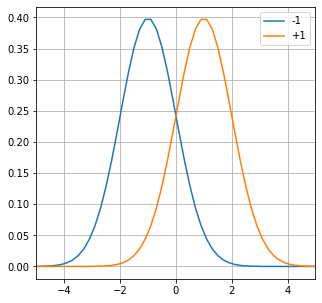

In [15]:
x_min = -100.0
x_max = 100.0
x = np.linspace(x_min, x_max, 1000)

y_minus_1 = scipy.stats.norm.pdf(x,-1,1)
y_plus_1 = scipy.stats.norm.pdf(x,1,1)

plt.figure(figsize=(5,5)) 
plt.plot(x, y_minus_1, label='-1') 
plt.plot(x, y_plus_1, label='+1')
plt.legend()
plt.grid(True)
plt.xlim(-5,5)
plt.show()

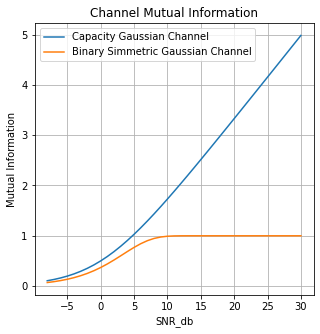

In [8]:
plt.figure(figsize=(5,5)) 
plt.plot(snr_db, C_gaussian_ch, label='Capacity Gaussian Channel') 
plt.plot(snr_db, C_bsc, label='Binary Simmetric Gaussian Channel')
plt.title('Channel Mutual Information')
plt.xlabel('SNR_db')
plt.ylabel('Mutual Information')
plt.legend()
plt.grid(True)
plt.show()

In [22]:
h = list(zip([4,5],[6,2]))
print(h[1][1])

2
